In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os
import seaborn as sns
from scipy.stats import binned_statistic
import matplotlib
import matplotlib.backends.backend_pdf
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from datetime import datetime

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [2]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'
graham_output_dir = dev_path + 'graham_output_cats_new/'

In [11]:
#### clean catalog

def clean_cat(cat):
    print(len(cat))
    cat = cat[cat['inside_u'] == True]
    cat = cat[cat['inside_hsc'] == True]
    cat = cat[cat['isStar']==False]
    cat = cat[cat['isCompact']==False]
    cat = cat[cat['snr_i']>5]
    cat = cat[cat['snr_r']>3]
    cat = cat[cat['snr_z']>3]
    cat = cat[cat['cmodel_fail_flag']<2]
    
    return cat

#### load in catalogs (COSMOS)

In [12]:
cat_11b = Table.read(graham_output_dir+'pcat_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass_sfq_added.fits')
cat_11b = clean_cat(cat_11b)
cat_6b = Table.read(graham_output_dir+'pcat_z6B_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass_sfq_added.fits')
cat_6b = clean_cat(cat_6b)

print(len(cat_11b),len(cat_6b)) 

1903725
1903725
1563284 1563284


(0, 6)

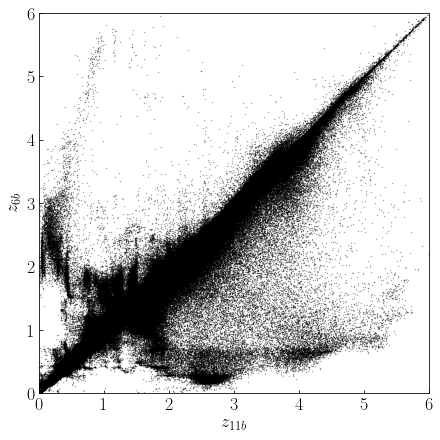

In [19]:
# z vs z

fig = plt.figure(figsize=(7,7))
plt.scatter(cat_11b['Z_COMBINE'],cat_6b['Z_COMBINE'],s=0.1,alpha=0.5,color='k')
plt.xlabel('$z_{11b}$',fontsize=18)
plt.ylabel('$z_{6b}$',fontsize=18)
plt.xlim([0,6])
plt.ylim([0,6])


(7, 12)

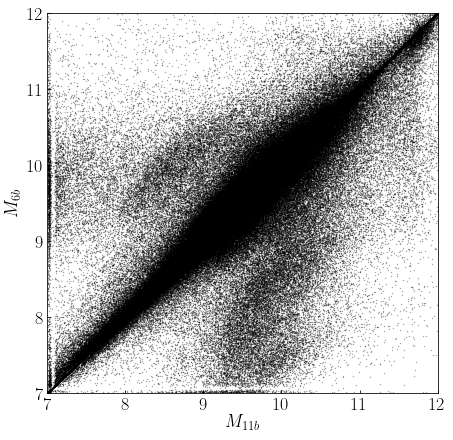

In [20]:
# mass vs mass

fig = plt.figure(figsize=(7,7))
plt.scatter(cat_11b['MASS_MED'],cat_6b['MASS_MED'],s=0.1,alpha=0.5,color='k')
plt.xlabel('$M_{11b}$',fontsize=18)
plt.ylabel('$M_{6b}$',fontsize=18)
plt.xlim([7,12])
plt.ylim([7,12])
